In [ ]:
#| default_exp experiments.darts.preprocessing

In [ ]:
#| export
import numpy as np 
import pandas as pd
from darts.dataprocessing.transformers import Scaler
from darts import TimeSeries

from national.time_series.process import time_series as gen_time_series
from national.data_preprocessing import date_features

In [ ]:
#| export
def _normalize(ts):

    scaler = Scaler()
    return scaler, scaler.fit_transform(ts)

In [ ]:
#| export
def _preprocess(
    df: pd.DataFrame,
    *,
    kpi: str,
    freq: str,
    time_col: str,
    normalize: bool,
) -> TimeSeries:
    mask = df[kpi] > 0

    ts = gen_time_series(
        df=df[mask],
        time_column='date',
        freq=freq,
        agg_method={kpi:np.mean, },
    )

    ts.dropna(inplace=True)

    ts = TimeSeries.from_dataframe(
        ts.reset_index(),
        time_col=time_col,
        value_cols=kpi,
    )

    if normalize:
        scaler, ts = _normalize(ts)
        return scaler,ts

    return None,ts

In [ ]:
#| export
class Data:


    def __init__(
        self,
        df: pd.DataFrame,
        kwargs: dict = {},
    ):
                
        self.kpi = kwargs['kpi'] if 'kpi' in kwargs.keys() else 'price'
        self.freq = kwargs['freq'] if 'freq' in kwargs.keys() else 'W-MON'
        self.time_col = kwargs['time_col'] if 'time_col' in kwargs.keys() else 'date'
        self.normalize = kwargs['normalize'] if 'normalize' in kwargs.keys() else True

        self.scaler, self.time_series = _preprocess(
            df=df,
            kpi=self.kpi,
            freq=self.freq,
            time_col=self.time_col,
            normalize=self.normalize,
        )

In [ ]:
from national.experiments.darts import preprocessing
data_ob = date_features.Data()
data = preprocessing.Data(
    df= data_ob.national_historic,
    kwargs=dict(
    time_col='date',    
    kpi='price',
    freq='W-MON',
    normalize=False,)
)

data_norm = preprocessing.Data(
    df= data_ob.national_historic,
)

ValueError: The time index of the provided DataArray is missing the freq attribute, and the frequency could not be directly inferred. This probably comes from inconsistent date frequencies with missing dates. If you know the actual frequency, try setting `fill_missing_dates=True, freq=actual_frequency`. If not, try setting `fill_missing_dates=True, freq=None` to see if a frequency can be inferred.


ValueError: The time index of the provided DataArray is missing the freq attribute, and the frequency could not be directly inferred. This probably comes from inconsistent date frequencies with missing dates. If you know the actual frequency, try setting `fill_missing_dates=True, freq=actual_frequency`. If not, try setting `fill_missing_dates=True, freq=None` to see if a frequency can be inferred.

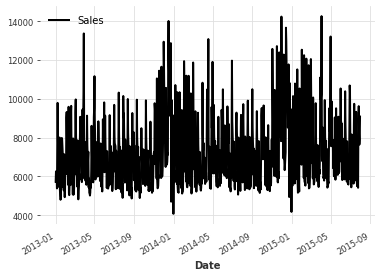

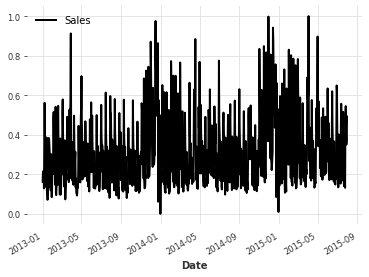

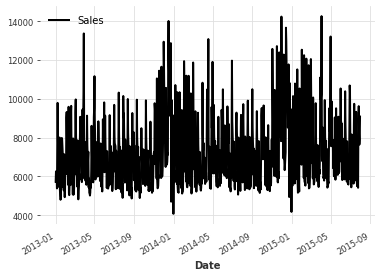

In [ ]:
#| include: false
data.time_series.plot("Raw")
data_norm.time_series.plot("Scaled")
data_norm.scaler.inverse_transform(data_norm.time_series).plot("Raw -> Scaled -> Inverse Scaled")